# Spatial distribution of *Gracillaria vermiculophylla* in French and

Spanish estuaries using Unmaned Aerial Vehicule.

Simon Oiry¹ [](https://orcid.org/0000-0001-7161-5246) (, Institut des Substances et Organismes de la Mer, ISOMer, , , )  
Bede Ffinian Rowe Davies¹ [](https://orcid.org/0000-0001-6462-4347) ()  
Pierre Gernez¹ [](https://orcid.org/0000-0003-2055-410X) ()  
Laurent Barillé¹ [](https://orcid.org/0000-0001-5138-2684) ()  
December 6, 2024

To be Written

[1]

[1] Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France

In [ ]:
library(tidyverse)
library(terra)
library(rnaturalearth) 
library(rnaturalearthdata) 
library(sf)
library(Utilities.Package)
library(flextable)


Attachement du package : 'flextable'

Les objets suivants sont masqués depuis 'package:terra':

    align, colorize, rotate, width

L'objet suivant est masqué depuis 'package:purrr':

    compose

In [ ]:
my_comma<-scales::label_comma(accuracy = NULL, big.mark = ",",decimal.mark = ".")

# Introduction

The introduction of Non-Indigenous Species (NIS) in terrestrial, freshwater, and marine ecosystems is one of the major threats to biodiversity worldwide. In particular, the proliferation and rapid spread of Invasive Alien Species (IAS) can radically change the structure and functioning of marine ecosystems, , requiring effective inventorying and monitoring programs \[@d15020161\]. In Europe, 874 NIS have been introduced to the marine environment so far (i.e. until 2020) and it is expected that the rate of biological invasions will continue to increase in the coming years \[@d14121077\]. Macroalgae represent more than 40 % of the NIS introduced to Europe waters, with many species native to the Temperate Northern Pacific \[@williams2007global\]. Amongst all invasive macroalgae, *Gracilaria vermiculophylla* \[@WoRMS303450\] (original name *Gracilariopsis vermiculophylla* \[@ohmi1956contributions\]; also known as *Agarophyton vermiculophyllum* \[@gurgel2018systematics\]), has spread extensively from its native distribution range in Japan and Korea \[@terada2002review\] across temperate estuaries in North America, Europe, and other regions, facilitated by aquaculture and maritime activities \[@rueness2005life; @weinberger2008invasive; @krueger2017genetic\]. While *G. vermiculophylla* can provide some ecosystem services, such as habitat for invertebrates and juvenile fish \[@davoult2017multiple\], it often outcompetes native vegetation, alters sediment composition \[@nyberg2009flora\], and disrupts trophic interactions \[@van2018global\]. In regions like the Baltic Sea and the eastern United States, it has been documented to negatively affect native fucoids and seagrasses \[@van2003reintroduction; @thomsen2013effects ; @firth2024invasive\]. These impacts underscore the importance of monitoring and managing the spread of *G. vermiculophylla*, particularly as climate change and anthropogenic pressures continue to facilitate biological invasions. *G. vermiculophylla* success as an invader stems from its tolerance to a wide range of environmental conditions, including temperature \[@sotka2018combining\], nutrient variability \[@abreu2011nitrogen\] and salinity \[@weinberger2008invasive\]. Its growth capacity at low salinities \[@rueness2005life ; @nyberg2007introduced\] explains its presence in the brackish waters of the Baltic Sea \[@weinberger2008invasive\] but also in the mesohaline sheltered part of estuaries of the Atlantic coast of Europe **(Surget et al., 2017)**. It is also present in confined areas of lagoons characterized by low hydrodynamism \[@abreu2011nitrogen ; @sfriso2012spreading\]. In Europe, it was first observed in 1996 in the Belon estuary (France) and later in many other estuaries on the Brittany coast of France \[@rueness2005life\]. It can be found on hard substrates such as invertebrate’s tubes and shells providing a substratum \[@thomsen2007gracilaria\] or attached to pebbles and rocks \[@terada2002review\] but the largest populations are colonizing soft-bottom sediment and particularly estuarine intertidal mudflats **(Surget et al., 2017)**. In this habitat, extensive dark red mats are observed at low tide, covering vast areas that have largely been unquantified in most studies. Therefore, *G. vermiculophylla* is capable of establishing populations in soft-bottom sediment habitats that were previously devoid of macroalgae \[@ramus2017invasive\]. These mats are usually monospecific with the alga thalli partially buried into the mud \[@rueness2005life ; @surget2017processus\]. Intertidal mats can however be temporarily overgrown by ephemeral green macroalgae \[@weinberger2008invasive\]. In the estuaries where *G. vermiculophylla* was first documented, large monospecific mats were reported to be confined to the upper intertidal zones \[@rueness2005life\]; however, their spatial distribution relative to the mudflat topography had not been quantitatively assessed. In fact, *G. vermiculophylla* has never been mapped using remote sensing techniques, and existing descriptions of its distribution lack spatially explicit mapping \[@thomsen2007gracilaria ; @weinberger2008invasive ; @abreu2011nitrogen ; @sfriso2012spreading\]

Remote sensing has revolutionized our ability to monitor and manage coastal ecosystems, offering efficient and scalable methods for detecting environmental changes in intertidal vegetation across a wide range of spatio-temporal scales \[@davies2024intertidal; @calleja2017long ; @davies2024sentinel ; @zoffoli2021decadal ; @valle2015mapping\]. Among remote-sensing technologies, drone-based imagery has recently emerged as a particularly promising tool for studying the spatial distribution of intertidal primary producers such as benthic microalgae \[@roman2021using ; @roman2024mapping\], seagrass \[@chand2021low ; @duffy2018spatial ; @roman2021using\] and macroalgae \[@rs14133124 ; @peidro2024quantifying\]. While it lacks the temporal consistency of satellite missions, drone remote sensing makes it possible to acquire at extremely high spatial resolution (i.e. cm-scale), rapidly target specific areas of interest, and to provide observations in overcast conditions. In particular, the potential of drone remote sensing for monitoring the surface area occupied by IAS has been demonstrated \[@roca2022monitoring\]. Drone-based photogrammetry also makes it possible to characterize the distribution of intertidal vegetation together with mudflat geomorphology, thus improving our understanding of primary producers patterning \[@brunier2022evolution ; @douglas2024linking\].

In this study, a drone-based multispectral remote sensing approach was applied to map *G. vermiculophylla* spatial distribution at a very-high spatial resolution in three intertidal estuaries of European Atlantic coast. We adapted the neural network classification model DISCOV (Drone Intertidal Substrate Classification Of Vegetation, @rs16234383, @oiry_2024_14218984) by specifically training the model with a new class corresponding to *G. vermiculophylla*. A validation dataset was obtained from *in situ* data to estimate the classification accuracy. LIDAR data were concurrently acquired to accurately map the intertidal elevation. We used a Generalized Additive Model (GAM) to examine the relationship between the seaweed spatial distribution and spatial metrics quantifying the mudflat topography. We expected the presence of G. vermiculophylla in mudflats to be associated to a specific height range as well as being more closely related to flat areas of the intertidal zone.

# Materiel & Methods

In [ ]:
building <- T   

layout<-"Data/Workflow_Figure" %>%
  list.files("V2.txt",full.names = T, recursive = T) %>%
  read_delim(delim = "\t", escape_double = FALSE,
    trim_ws = TRUE) %>%
  dplyr::filter(Evaluate == T)


layout$Text<- gsub("alaligne","\n", layout$Text)

boxes<- layout %>% 
  dplyr::filter(Type == "Box",
                shape == "square")


text<- layout %>% 
  dplyr::filter(Type == "Box")

diamonds<- layout %>% 
  dplyr::filter(Type == "Box",
                shape == "diamond")
diff = 0.1
for (i in 1:nrow(diamonds)) {
  diam_a<-diamonds[i,]
  
df<-data.frame(  
  x = c(diam_a$xmin - diff, diam_a$xmin + diff, diam_a$xmax + diff, diam_a$xmax - diff),
  y = c(diam_a$ymin, diam_a$ymax, diam_a$ymax, diam_a$ymin),
  Type = rep(diam_a$Type,4),
  Text = rep(diam_a$Text,4),
  Color = rep(diam_a$color,4),
  Evaluate = rep(diam_a$Evaluate,4),
  Resolution =  rep(diam_a$Resolution,4),
  Evaluate_bigbox = rep(diam_a$Evaluate_bigbox,4),
  alpha = rep(diam_a$alpha,4),
  shape =  rep(diam_a$shape,4)
)
  if(i == 1){
    diamond_list<-list(df)
  }else{
    diamond_list[[i]]<-df
  }
}



Arrows<- layout %>% 
  dplyr::filter(Type == "Arrow",
                Evaluate == T)

Group_box<-layout %>% 
  dplyr::filter(Type == "Box",
                Evaluate_bigbox == T) %>% 
  group_by(Group) %>% 
  dplyr::summarise(xmin = min(xmin)-0.1,
                   xmax = max(xmax)+0.1,
                   ymin = min(ymin)-0.1,
                   ymax = max(ymax)+0.1,
                   alpha = 0.1,
                   color = color)

resolution_box<-layout %>% 
  dplyr::filter(Type == "Box",
                Resolution != "NA") %>% 
  group_by(Resolution) %>% 
  dplyr::summarise(xmin = min(xmin)-0.1,
                   xmax = max(xmax)+0.1,
                   ymin = min(ymin)-0.1,
                   ymax = max(ymax)+0.1,
                   alpha = 0.1,
                   color = color)

legend = data.frame(color = unique(layout$color)) %>% 
  dplyr::filter(!is.na(color)) %>% 
  mutate(label = case_when(color == "#EA6155" ~ "Input Data",
                           color == "#DC9614" ~ "Pre-processing",
                           color == "#52A4DA" ~ "Model Building",
                           color == "#79DA52" ~ "Validation",
                           color == "#DA9652" ~ "Output Data",
                           color == "darkcyan" ~ "Final Product",
                           color == "#DA5273"  ~ "Prediction",
                           TRUE ~ "NA")) %>% 
  arrange

segment<-layout %>% 
  dplyr::filter(Type == "Segment")

if(building == T){
  
text_size = 6 #### 6 to plot it fullscreen in R,  1.8 for exporting with ggsave
line_size =1 ####arrow_size 0.3 to export  1 to for R plotting

legend_size = 1 #### 0.3 to export, 1 for R ploting
legend_text = 10 #### 4 to export, 10 for R ploting
}else{
  
text_size = 1.85 #### 6 to plot it fullscreen in R,  1.8 for exporting with ggsave
line_size =0.3 ####arrow_size 0.3 to export  1 to for R plotting

legend_size = 0.3 #### 0.3 to export, 1 for R ploting
legend_text = 5 #### 5 to export, 10 for R ploting
  
}


a<-ggplot()+
  
  # statebins:::geom_rrect(data = Group_box,
  #           mapping = aes(xmin = xmin,
  #                         xmax= xmax,
  #                         ymin = ymin,
  #                         ymax = ymax),
  #           alpha = 0.05,
  #           size = 0.2,
  #           show.legend = F,
  #           fill = Group_box$color,
  #           color = "black")+
  
    # statebins:::geom_rrect(data = resolution_box,
    #         mapping = aes(xmin = xmin,
    #                       xmax= xmax,
    #                       ymin = ymin,
    #                       ymax = ymax,
    #                       alpha = rep(c("Input Data", "Pre-processing", "Model Building", "Prediction", "Validation", "Output Data", "Final Product"),2)),
    #         fill = "NA",
    #         linetype = 2,
    #         size = 0.4,
    #         color = "black")+
  
  scale_alpha_manual(name = "", 
                     values = c(1,1,1,1,1,1,1),
                     labels = c("Input Data", "Pre-Processing", "Model Building", "Prediction", "Validation", "Output Data", "Final Product"),
                     guide = guide_legend(ncol = 1, override.aes = list(fill = c("#f94144", "#f3722c", "#f8961e", "#f9c74f", "#90be6d", "#43aa8b", "#577590"),
                                                                        shape = c(22),
                                                                        linetype = c(1),
                                                                        alpha = c(0.5)
                                                                        )
                                          )
                     )+
  
  statebins:::geom_rrect(data = boxes,
            mapping = aes(xmin = xmin,
                          xmax= xmax,
                          ymin = ymin,
                          ymax = ymax
                          ),
            size = 0.2,
            alpha = as.numeric(boxes$alpha),
            fill = boxes$color,
            color = "black")
  
  for(i in 1:length(diamond_list)){
    poly_i<-diamond_list[[i]]
    a<-a+
      geom_polygon(data = poly_i, 
                   mapping = aes(x = x, 
                                 y = y
                                 ),
                  size = 0.2,
                   alpha = poly_i$alpha,
                   fill = poly_i$Color,
                   color = "black")
    
  }

if(building == T){
    a<-a+
    geom_text(data = text,
            mapping = aes(x = (xmax+xmin)/2, y = (ymax + ymin)/2, label = (ID)), size = text_size)
  
}else{
    a<-a+
    geom_text(data = text,
            mapping = aes(x = (xmax+xmin)/2, y = (ymax + ymin)/2, label = (Text)), size = text_size)
}


  a<-a+
    geom_segment(data = Arrows, aes( x = xmin, xend = xmax, y = ymin, yend = ymax),
    size=line_size, linejoin = "mitre", lineend = "butt",
    arrow = arrow(length = unit(1, "mm"), type= "closed")
    )+
    geom_segment(data = segment, aes( x = xmin, xend = xmax, y = ymin, yend = ymax),
    size=line_size, linejoin = "mitre", lineend = "square"
    )
    
  if(building == F){
  a<- a+ theme_void()
  }
  
  a<-a+
  theme(legend.position = c(0.88,0.3),
        legend.text = element_text(size = legend_text),
        legend.key.size = unit(legend_size, 'cm'),
        plot.background = element_rect(fill = "white",color = NA)
        )+
  scale_x_continuous(breaks = scales::breaks_width(0.5))+
  scale_y_continuous(breaks = scales::breaks_width(0.5))
  
if(building == T){
a
}else{
  ggsave("Paper/Figures/Workflow.png",a, units = "px")
}

## Study sites

Field campaigns were conducted at three study sites in France and Spain. At each site, two locations were investigated \[@fig-location_sites\]. The Aven & Belon Estuary in South Brittany, France (@fig-location_sites A & C), is a dynamic ria-type system hosting diverse habitats, including sandy tidal flats and subtidal zones with coarse, marine-origin sediments \[@Michel2021; @Castaing1995\]. These habitats support key benthic species such as *Scrobicularia plana*, *Cerastoderma edule*, and *Tellina tenuis*, which play essential roles in sediment bioturbation and nutrient cycling \[@Tankoua2011; @Blanchet2014\]. The estuary serves as a nursery for juvenile fish and a feeding ground for migratory birds, with its ecological productivity driven by a mix of euryhaline and marine species adapted to salinity gradients \[@Blanchet2014\]. Oyster farming, particularly *Crassostrea gigas*, is a dominant activity, altering sediment dynamics and local biodiversity \[@Michel2021\]. Despite its ecological richness, the estuary faces pressures from nutrient loading and physical alterations, with bioindicators like *S. plana* used to monitor the impacts of salinity, sediment quality, and pollution \[@Tankoua2011\].

In [ ]:
"The Ria d'Étel, located in Brittany, France, is a macrotidal estuary characterized by its unique hydrodynamics and biodiversity (@fig-location_sites B). Influenced predominantly by tidal regimes, the estuary exhibits high-energy zones with strong currents reaching up to 2.5 m/s, shaping both sediment deposition and ecological habitats [@Portas2023]. The estuary supports diverse benthic communities, with sedimentary organic matter originating from both terrestrial inputs and marine sources, contributing to nutrient cycling and benthic fluxes [@Jeanneau2023]. Vegetation gradients transition from halophytic plants in saline zones to freshwater species upstream, reflecting the estuary's salinity dynamics and ecological complexity [@Cianfaglione2018]. This estuary is also notable for its shellfish farming, with species like *Crassostrea gigas* cultivated extensively. The presence of filter-feeding organisms such as sponges (*Hymeniacidon perlevis*) enhances water quality by mitigating bacterial loads and promoting bioremediation [@Gentric2024]. However, the estuary faces environmental pressures, including nutrient enrichment from agricultural runoff and anthropogenic impacts on sedimentary processes.
"

The Saja-Besaya Estuary, situated along the Cantabrian Sea in northern Spain, is characterized by the confluence of the Saja and Besaya rivers near Torrelavega (@fig-location_sites C). The estuary, also known as San Martín de la Arena or Suances Estuary, has been subject to significant anthropogenic pressures, including industrial developments throughout the 20th century. These activities have led to contamination from mining, paper manufacturing, and carbonate discharges, classifying the estuary as highly polluted near its upper reaches \[@ortega2005fluxes\]. This contamination impacts the estuarine ecosystem, including water quality and biodiversity, with minimal aquatic life and sparse riverbank vegetation in its lower sections \[@romero2008sintering\].

In [ ]:
######### Aven Belon 

mask_aven_belon <- read_sf("Data/shp/mask/mask_site_Aven_Belon_32630.shp")

HT <-  list.files("Data/Sentinel2/Aven_Belon/S2A_MSIL2A_20231107T111251_N0509_R137_T30TVT_20231107T144858.SAFE/GRANULE/L2A_T30TVT_A043749_20231107T111246/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_HT <- rast(HT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_aven_belon, mask = T) 
B8_HT <- B8_HT - 1000

B4_HT <- rast(HT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_aven_belon, mask = T)
B4_HT <- B4_HT -1000

NDVI_HT <- (B8_HT-B4_HT)/(B8_HT+B4_HT)


LT <-  list.files("Data/Sentinel2/Aven_Belon/S2A_MSIL2A_20240624T110641_N0510_R137_T30TVT_20240624T153247.SAFE/GRANULE/L2A_T30TVT_A047038_20240624T111001/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_LT <- rast(LT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_aven_belon, mask = T) 
B8_LT <- B8_LT - 1000

B4_LT <- rast(LT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_aven_belon, mask = T)
B4_LT <- B4_LT -1000

NDVI_LT <- (B8_LT-B4_LT)/(B8_LT+B4_LT)


intertidal_Aven_Belon <- NDVI_LT > 0.05 & NDVI_HT < -0.05


values(intertidal_Aven_Belon)[values(intertidal_Aven_Belon) == F] <- NA

mask_sf <- as.polygons(intertidal_Aven_Belon) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() %>% 
  smoothr::smooth(method = "ksmooth", smoothness = 3)
  
# plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_intertidal_Aven_Belon.shp")


Land_Aven_Belon <- NDVI_LT > 0.05 & NDVI_HT > 0.05


values(Land_Aven_Belon)[values(Land_Aven_Belon) == F] <- NA

mask_sf <- as.polygons(Land_Aven_Belon) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes()
  # smoothr::smooth(method = "ksmooth", smoothness = 3)
  
# plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_Land_Aven_Belon.shp")



######### ETEL

mask_Etel <- read_sf("Data/shp/mask/mask_site_Etel_32630.shp")

HT <-  list.files("Data/Sentinel2/Etel/S2A_MSIL2A_20231008T110941_N0509_R137_T30TVT_20231008T171550.SAFE/GRANULE/L2A_T30TVT_A043320_20231008T111641/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_HT <- rast(HT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_Etel, mask = T) 
B8_HT <- B8_HT - 1000

B4_HT <- rast(HT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_Etel, mask = T)
B4_HT <- B4_HT -1000

NDVI_HT <- (B8_HT-B4_HT)/(B8_HT+B4_HT)

LT <-  list.files("Data/Sentinel2/Etel/S2B_MSIL2A_20230718T112119_N0509_R037_T30TVT_20230718T124824.SAFE/GRANULE/L2A_T30TVT_A033239_20230718T112118/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_LT <- rast(LT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_Etel, mask = T) 
B8_LT <- B8_LT - 1000

B4_LT <- rast(LT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_Etel, mask = T)
B4_LT <- B4_LT -1000

NDVI_LT <- (B8_LT-B4_LT)/(B8_LT+B4_LT)


intertidal_Etel <- NDVI_LT > 0.05 & NDVI_HT < -0.05


values(intertidal_Etel)[values(intertidal_Etel) == F] <- NA

mask_sf <- as.polygons(intertidal_Etel) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() %>% 
  smoothr::smooth(method = "ksmooth", smoothness = 3)
  
# plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_intertidal_Etel.shp")


Land_Etel <- NDVI_LT > 0.05 & NDVI_HT > 0.05


values(Land_Etel)[values(Land_Etel) == F] <- NA

mask_sf <- as.polygons(Land_Etel) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() 
  
plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_Land_Etel.shp")

######### SAJA

mask_SAJA <- read_sf("Data/shp/mask/mask_site_Saja_32630.shp")


HT <-  list.files("Data/Sentinel2/Saja/S2A_MSIL2A_20181004T110911_N0500_R137_T30TVP_20230620T014212.SAFE/GRANULE/L2A_T30TVP_A017151_20181004T111207/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_HT <- rast(HT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_SAJA, mask = T) 
B8_HT <- B8_HT - 1000

B4_HT <- rast(HT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_SAJA, mask = T)
B4_HT <- B4_HT -1000

NDVI_HT <- (B8_HT-B4_HT)/(B8_HT+B4_HT)


LT <-  list.files("Data/Sentinel2/Saja/S2A_MSIL2A_20230928T110831_N0509_R137_T30TVP_20230928T171657.SAFE/GRANULE/L2A_T30TVP_A043177_20230928T111532/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_LT <- rast(LT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_SAJA, mask = T) 
B8_LT <- B8_LT - 1000

B4_LT <- rast(LT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_SAJA, mask = T)
B4_LT <- B4_LT -1000

NDVI_LT <- (B8_LT-B4_LT)/(B8_LT+B4_LT)


intertidal_Saja <- NDVI_LT > 0.05 & NDVI_HT < -0.05


values(intertidal_Saja)[values(intertidal_Saja) == F] <- NA

mask_sf <- as.polygons(intertidal_Saja) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() %>% 
  smoothr::smooth(method = "ksmooth", smoothness = 3)
  
# plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_intertidal_Saja.shp")


Land_Saja <- NDVI_LT > 0.05 & NDVI_HT > 0.05

values(Land_Saja)[values(Land_Saja) == F] <- NA

mask_sf <- as.polygons(Land_Saja) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() %>% 
  smoothr::smooth(method = "ksmooth", smoothness = 3)
  
plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_Land_Saja.shp")

In [ ]:
sovereignty10 <- ne_countries(scale = 10, returnclass = "sf")

world_map <- sovereignty10 %>% 
  st_as_sf() %>% 
  dplyr::filter(sovereignt%in%c("Spain","France","Portugal",
                                "Italy","Andorra",
                                "United Kingdom",
                                "Switzerland","Belgium",
                                "Germany","Luxembourg") ) 

bbox_europe <- st_bbox(c(xmin = -20, ymin = 34,
                         xmax = 20, ymax = 55) ,
                       crs = st_crs(world_map) ) 

world_map<-st_make_valid(world_map) 

european_union_map_cropped <- st_crop(world_map, bbox_europe)  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ")  


UnitedKingdom<-sovereignty10 %>% 
  st_as_sf() %>% 
  dplyr::filter(sovereignt%in%c("United Kingdom") ) %>% 
  st_cast("POLYGON") 

bbox_UK <- st_bbox(c(xmin = -20, ymin = 45,
                         xmax = 20, ymax = 55) ,
                       crs = st_crs(UnitedKingdom) ) 

UnitedKingdom<-st_make_valid(UnitedKingdom) 

UK_map_cropped <- st_crop(UnitedKingdom, bbox_UK)  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ") 

Europe_sf<-european_union_map_cropped %>% 
  dplyr::bind_rows(UK_map_cropped) 


Projects<-data.frame(
  Name=c(
  "France - Aven",
  "France - Belon",
  "Spain - Saja Estuary"
  ) ,
  Long=c(-3.187818,
         -3.187818, 
         -4.025402) ,
  Lat=c(47.697566, 
        47.697566,
        43.408356) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ")  

Projects_df<-Projects %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)

Miniworld_map <- sovereignty10 %>% 
  st_as_sf()

sf_use_s2(FALSE)

bbox_EU <- st_bbox(c(xmin = -30, ymin = 20,
                         xmax = 50, ymax = 70) ,
                       crs = st_crs(Miniworld_map) ) 

  MiniEU_map<-st_crop(Miniworld_map, bbox_EU)  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ")  

  df_P1<-Projects_df %>% 
    mutate(ID = c(1:nrow(.))) %>% 
    mutate(Site = case_when(ID == 1 ~ "Aven Estuary",
                            ID == 2 ~ "Bélon Estuary",
                            ID == 3 ~ "Saja Estuary",
                            TRUE ~ "NA"),
           ID = case_when(ID == 1 ~ "A",
                          ID == 2 ~ "B",
                          TRUE ~ "C"),
           lon_label = 2900000,
           lat_label = case_when(Site == "Aven Estuary" ~ lat  - 200000,
                                 Site == "Bélon Estuary" ~ lat + 50000,
                                 Site == "Saja Estuary" ~ lat  - 250000,),
           lat_ID = lat_label + 100000) %>% 
    dplyr::select(c(lon,lat,lon_label,lat_label,lat_ID,ID,Site))
    
    scaleFUN <- function(x) paste0(sprintf("%.2f", x),"°N")
(
p1 <- ggplot(MiniEU_map) +
  geom_sf(linewidth = 0.5, alpha = 0.93, fill = "#CFCFCF", colour = "grey30") +
  geom_segment(data = df_P1, aes(x = lon_label, xend = lon, yend = lat, y =lat_label, group = ID), color = "goldenrod4",size = 1)+
  geom_point(data = df_P1, aes(x = lon, y =lat), color = "darkred", alpha = 0.8, size = 5)+
  geom_label(data = df_P1, aes(x = lon_label, y =lat_label, label = Site), fill = "#FFD27D",size = 5)+
  geom_label(data = df_P1, aes(x = lon_label, y = lat_ID, label = c("B","A","C")), size = 6)+
  coord_sf(
    xlim = c(2600000, 4100000),
    ylim = c(1600000, 3100000), 
    expand = FALSE
  ) +
  theme_Bede_Map() +
  labs(x = "Longitude", y = "Latitude") +
  scale_x_continuous(breaks = 0) +
  scale_y_continuous(breaks = 42, labels = scaleFUN) +
  # theme_void() +
  theme(
    plot.margin = unit(c(0, 0, 0, 0), "cm"),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    axis.text.x = element_text(size = 20, vjust = 7.1, hjust = 0.8),
    axis.text.y = element_text(size = 20, vjust = -5, hjust = 0, angle = 90),
    # panel.border = element_rect(color = "black", fill = NA),
    # panel.background = element_rect(fill = "white"),
    # plot.background = element_rect(fill = "white", color = NA),
    # legend.background = element_rect(fill = "transparent"),
    # panel.grid.major = element_line(color = "grey", linetype = "dashed", linewidth = 0.5),
    # panel.grid.minor = element_line(color = "grey", linetype = "dotted", linewidth = 0.25)
  ))



ggsave("Paper/Figures/High_res/Figure1/Map_Drone_Sites.png",p1,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_Drone_Sites.png",p1,width= 10, height=10, dpi = 200) 

In [ ]:
create_square_sf <- function(side_length, center_lonlat) {
  # Validate input
  if (length(center_lonlat) != 2) {
    stop("Please provide the center coordinates as a vector: c(longitude, latitude).")
  }
  if (!is.numeric(side_length) || side_length <= 0) {
    stop("Please provide a positive numeric value for the side length.")
  }
  
  # Define the center point in lon/lat
  center_point <- st_sfc(st_point(center_lonlat), crs = 4326)
  
  # Transform to EPSG:32630
  center_point_utm <- st_transform(center_point, 32630)
  center_coords <- st_coordinates(center_point_utm)
  
  # Calculate half side length in meters
  half_side <- side_length / 2
  
  # Create the square corners in UTM
  square_coords <- matrix(c(
    center_coords[1] - half_side, center_coords[2] - half_side,
    center_coords[1] + half_side, center_coords[2] - half_side,
    center_coords[1] + half_side, center_coords[2] + half_side,
    center_coords[1] - half_side, center_coords[2] + half_side,
    center_coords[1] - half_side, center_coords[2] - half_side # Close the square
  ), ncol = 2, byrow = TRUE)
  
  # Create a polygon from the coordinates
  square_polygon <- st_polygon(list(square_coords))
  
  # Create an sf object
  square_sf <- st_sfc(square_polygon, crs = 32630)
  
  return(square_sf)
}

In [ ]:
It_Saja <- "Data/shp/Intertidal_sites/mask_intertidal_Saja.shp" %>% 
  read_sf()

Land_Saja <- "Data/shp/Intertidal_sites/mask_Land_Saja.shp" %>% 
  read_sf()

ext_plot_Saja <- st_bbox(create_square_sf(5000, c(-4.025987, 43.4200065)))



Flight_Saja<-data.frame(
  Name=c(
  "Marisma de \nCortiguera",
  "Marisma de \nCudón"),
  Long=c(-4.029591,
         -4.031800) ,
  Lat=c(43.409738,
        43.414434)
  )  %>%
  st_as_sf(coords=c("Long","Lat") )  %>%
  st_set_crs("EPSG:4326")  %>%
  st_transform(crs(Land_Saja))  %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>%
  sf::st_set_geometry(NULL) %>% 
  mutate(lon_label = case_when(Name == "Marisma de \nCudón" ~ 418639.3,
                               Name == "Marisma de \nCortiguera" ~ lon + 2000),
         lat_label = case_when(Name == "Marisma de \nCudón" ~ lat + 1000,
                               Name == "Marisma de \nCortiguera" ~ lat + 500))

(plot_Saja <- ggplot() +
  geom_sf(data = Land_Saja, linewidth = 0.05, alpha = 0.93, fill = "grey80") +
  geom_sf(data = It_Saja, linewidth = 0.05, alpha = 0.93, fill = "goldenrod")+
    geom_label(aes(x = as.numeric(ext_plot_Saja[1]) + (as.numeric(ext_plot_Saja[3])-as.numeric(ext_plot_Saja[1]))*0.1 , 
                   y = as.numeric(ext_plot_Saja[2]) + (as.numeric(ext_plot_Saja[4])-as.numeric(ext_plot_Saja[2]))*0.1
                   , label = "C"), 
               size = 10,
               alpha = 0.5 )+
  coord_sf(
    xlim = c(ext_plot_Saja[1], ext_plot_Saja[3]),
    ylim = c(ext_plot_Saja[2], ext_plot_Saja[4]),
    expand = F
  ) +
  geom_segment(data = Flight_Saja, aes(x = lon_label, xend = lon, yend = lat, y =lat_label, group = Name), color = "goldenrod4",size = 1)+
  geom_point(data = Flight_Saja, aes(x = lon, y =lat), color = "darkred", alpha = 0.8, size = 5)+
  geom_label(data = Flight_Saja, aes(x = lon_label, y =lat_label, label = Name), fill = "#FFD27D",size = 5)+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  scale_x_continuous(breaks = -4.01) +
  scale_y_continuous(breaks = 43.415) +
  # Move y-axis to the right
  theme(
    legend.background = element_rect(fill = alpha("white", 0)),
    plot.background = element_rect(fill = "white", color = NA),
    axis.text.x = element_text(vjust = 4.5,  size = 20),
    axis.text.y = element_text(angle = 90, vjust = -4, hjust = 0.5, size = 20),
    axis.title = element_blank(),
    axis.ticks = element_blank()
    )  # Adjust position if needed  )
)

ggsave("Paper/Figures/High_res/Figure1/Map_Saja.png",plot_Saja,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_Saja.png",plot_Saja,width= 10, height=10, dpi = 200)  

In [ ]:
It_AB <- "Data/shp/Intertidal_sites/mask_intertidal_Aven_Belon.shp" %>% 
  read_sf()

Land_AB <- "Data/shp/Intertidal_sites/mask_Land_Aven_Belon.shp" %>% 
  read_sf()

ext_plot_AB <- st_bbox(create_square_sf(8000, c(-3.780146, 47.810000)))


Flight_AB<-data.frame(
  Name=c(
  "Notre-Dame De Tremor"),
  Long=c(-3.748634) ,
  Lat=c(47.837923)
  )  %>%
  st_as_sf(coords=c("Long","Lat") )  %>%
  st_set_crs("EPSG:4326")  %>%
  st_transform(crs(Land_Saja))  %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>%
  sf::st_set_geometry(NULL) %>% 
  mutate(lon_label = case_when(Name == "Notre-Dame De Tremor" ~  as.numeric(ext_plot_AB[1]) + (as.numeric(ext_plot_AB[4])-as.numeric(ext_plot_AB[2]))*0.35),
         lat_label = case_when(Name == "Notre-Dame De Tremor" ~  as.numeric(ext_plot_AB[2]) + (as.numeric(ext_plot_AB[4])-as.numeric(ext_plot_AB[2]))*0.85))

(Plot_Aven <- ggplot() +
  geom_sf(data = Land_AB, linewidth = 0.05, alpha = 0.93, fill = "grey80") +
  geom_sf(data = It_AB, linewidth = 0.05, alpha = 0.93, fill = "goldenrod") +
    geom_label(aes(x = as.numeric(ext_plot_AB[1]) + (as.numeric(ext_plot_AB[3])-as.numeric(ext_plot_AB[1]))*0.1 , 
                   y = as.numeric(ext_plot_AB[2]) + (as.numeric(ext_plot_AB[4])-as.numeric(ext_plot_AB[2]))*0.1
                   , label = "A"), 
               size = 10,
               alpha = 0.5 )+
  coord_sf(
    xlim = c(ext_plot_AB[1], ext_plot_AB[3]),
    ylim = c(ext_plot_AB[2], ext_plot_AB[4]),
    expand = F
  ) +
  geom_segment(data = Flight_AB, aes(x = lon_label, xend = lon, yend = lat, y =lat_label, group = Name), color = "goldenrod4",size = 1)+
  geom_point(data = Flight_AB, aes(x = lon, y =lat), color = "darkred", alpha = 0.8, size = 5)+
  geom_label(data = Flight_AB, aes(x = lon_label, y =lat_label, label = Name), fill = "#FFD27D",size = 5)+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  scale_x_continuous(breaks = -3.725) +
  scale_y_continuous(breaks = 47.82) +
  # Move y-axis to the right
  theme(
    legend.background = element_rect(fill = alpha("white", 0)),
    plot.background = element_rect(fill = "white", color = NA),
    axis.text.x = element_text(vjust = 7.5,  size = 20),
    axis.text.y = element_text(angle = 90, vjust = -7, hjust = 0.5, size = 20),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    legend.box = "vertical",  # Stack legends vertically
    legend.box.just = "left",  # Align the legends to the left
    legend.spacing.y = unit(0.0, 'mm'),  # Adjust the spacing between items
    legend.key = element_rect(fill = "white", color = "black"),  # Ensure clear legend keys
    legend.box.margin = margin(5, 5, 5, 5),
    panel.grid.major = ggplot2::element_line(linetype = "dotted", 
      colour = alpha("grey30",0.5), linewidth = 0.25)
    )  # Adjust position if needed  )
)

ggsave("Paper/Figures/High_res/Figure1/Map_AB.png",Plot_Aven,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_AB.png",Plot_Aven,width= 10, height=10, dpi = 200)  

In [ ]:
It_AB <- "Data/shp/Intertidal_sites/mask_intertidal_Aven_Belon.shp" %>% 
  read_sf()

Land_AB <- "Data/shp/Intertidal_sites/mask_Land_Aven_Belon.shp" %>% 
  read_sf()

ext_plot_B <- st_bbox(create_square_sf(8000, c(-3.690000, 47.800000)))


Flight_AB<-data.frame(
  Name=c("Pont du Guilly"),
  Long=c(-3.655220) ,
  Lat=c(47.822408)
  )  %>%
  st_as_sf(coords=c("Long","Lat") )  %>%
  st_set_crs("EPSG:4326")  %>%
  st_transform(crs(Land_Saja))  %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>%
  sf::st_set_geometry(NULL) %>% 
  mutate(lon_label = case_when(Name == "Pont du Guilly" ~ as.numeric(ext_plot_B[1]) + (as.numeric(ext_plot_B[3])-as.numeric(ext_plot_B[1]))*0.7),
         lat_label = case_when(Name ==  "Pont du Guilly" ~  as.numeric(ext_plot_B[2]) + (as.numeric(ext_plot_B[4])-as.numeric(ext_plot_B[2]))*0.7))

(plot_Belon <- ggplot() +
  geom_sf(data = Land_AB, linewidth = 0.05, alpha = 0.93, fill = "grey80") +
  geom_sf(data = It_AB, linewidth = 0.05, alpha = 0.93, fill = "goldenrod") +
    geom_label(aes(x = as.numeric(ext_plot_B[1]) + (as.numeric(ext_plot_B[3])-as.numeric(ext_plot_B[1]))*0.1 , 
                   y = as.numeric(ext_plot_B[2]) + (as.numeric(ext_plot_B[4])-as.numeric(ext_plot_B[2]))*0.1
                   , label = "B"), 
               size = 10,
               alpha = 0.5 )+
  coord_sf(
    xlim = c(ext_plot_B[1], ext_plot_B[3]),
    ylim = c(ext_plot_B[2], ext_plot_B[4]),
    expand = F
  ) +
  geom_segment(data = Flight_AB, aes(x = lon_label, xend = lon, yend = lat, y =lat_label, group = Name), color = "goldenrod4",size = 1)+
  geom_point(data = Flight_AB, aes(x = lon, y =lat), color = "darkred", alpha = 0.8, size = 5)+
  geom_label(data = Flight_AB, aes(x = lon_label, y =lat_label, label = Name), fill = "#FFD27D",size = 5)+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  scale_x_continuous(breaks = -3.67) +
  scale_y_continuous(breaks = 47.82) +
  # Move y-axis to the right
  theme(
    legend.background = element_rect(fill = alpha("white", 0)),
    plot.background = element_rect(fill = "white", color = NA),
    axis.text.x = element_text(vjust = 7.5,  size = 20),
    axis.text.y = element_text(angle = 90, vjust = -7, hjust = 0.5, size = 20),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    legend.box = "vertical",  # Stack legends vertically
    legend.box.just = "left",  # Align the legends to the left
    legend.spacing.y = unit(0.0, 'mm'),  # Adjust the spacing between items
    legend.key = element_rect(fill = "white", color = "black"),  # Ensure clear legend keys
    legend.box.margin = margin(5, 5, 5, 5),
    panel.grid.major = ggplot2::element_line(linetype = "dotted", 
      colour = alpha("grey30",0.5), linewidth = 0.25)
    )  # Adjust position if needed  )
)

ggsave("Paper/Figures/High_res/Figure1/Map_AB.png",plot_AB,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_AB.png",plot_AB,width= 10, height=10, dpi = 200)  

In [ ]:
It_Etel <- "Data/shp/Intertidal_sites/mask_intertidal_Etel.shp" %>% 
  read_sf()

Land_Etel <- "Data/shp/Intertidal_sites/mask_Land_Etel.shp" %>% 
  read_sf()



ext_plot_Etel <- st_bbox(create_square_sf(10000, c(-3.186821, 47.683477)))


Flight_Etel<-data.frame(
  Name=c(
  "Berringue",
  "Lorois"),
  Long=c(-3.194274,
         -3.205714) ,
  Lat=c(47.698978,
        47.675159)
  )  %>%
  st_as_sf(coords=c("Long","Lat") )  %>%
  st_set_crs("EPSG:4326")  %>%
  st_transform(crs(Land_Saja))  %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>%
  sf::st_set_geometry(NULL) %>% 
  mutate(lon_label = case_when(Name == "Berringue" ~ lon - 1000,
                               Name == "Lorois" ~ lon + 2000),
         lat_label = case_when(Name ==  "Berringue" ~ lat + 1000,
                               Name == "Lorois" ~ lat - 1000))


(plot_Etel <- ggplot() +
  geom_sf(data = Land_Etel, linewidth = 0.05, alpha = 0.93, fill = "grey80") +
  geom_sf(data = It_Etel, linewidth = 0.05, alpha = 0.93, fill = "goldenrod") +
    geom_label(aes(x = as.numeric(ext_plot_Etel[1]) + (as.numeric(ext_plot_Etel[3])-as.numeric(ext_plot_Etel[1]))*0.1 , 
                   y = as.numeric(ext_plot_Etel[2]) + (as.numeric(ext_plot_Etel[4])-as.numeric(ext_plot_Etel[2]))*0.1
                   , label = "B"), 
               size = 10,
               alpha = 0.5 )+
  coord_sf(
    xlim = c(ext_plot_Etel[1], ext_plot_Etel[3]),
    ylim = c(ext_plot_Etel[2], ext_plot_Etel[4]),
    # ndiscr = 1,
    expand = FALSE
  ) +
  scale_x_continuous(breaks = -3.2) +
  scale_y_continuous(breaks = 47.68) +
  geom_segment(data = Flight_Etel, aes(x = lon_label, xend = lon, yend = lat, y =lat_label, group = Name), color = "goldenrod4",size = 1)+
  geom_point(data = Flight_Etel, aes(x = lon, y =lat), color = "darkred", alpha = 0.8, size = 5)+
  geom_label(data = Flight_Etel, aes(x = lon_label, y =lat_label, label = Name), fill = "#FFD27D",size = 5)+
  theme_Bede_Map() +
  labs(x = "Longitude", y = "Latitude")+
  # scale_x_continuous(breaks = seq(floor(ext_plot_Etel[1]), ceiling(ext_plot_Etel[3]), by = 500)) +
  # scale_y_continuous(breaks = seq(floor(ext_plot_Etel[2]), ceiling(ext_plot_Etel[4]), by = 500)) +

  theme(
    legend.background = element_rect(fill = alpha("white", 0)),
    plot.background = element_rect(fill = "white", color = NA),
    axis.text.x = element_text(vjust = 7.5,  size = 20),
    axis.text.y = element_text(angle = 90, vjust = -7, hjust = 0.5, size = 20),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    legend.box = "vertical",
    legend.box.just = "left",
    legend.spacing.y = unit(0.0, 'mm'),
    legend.key = element_rect(fill = "white", color = "black"),
    legend.box.margin = margin(5, 5, 5, 5),
    panel.grid.major = element_line(
      linetype = "dotted",
      colour = alpha("grey30", 0.5),
      linewidth = 0.25
    )
  )
)

ggsave("Paper/Figures/High_res/Figure1/Map_Etel.png",plot_AB,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_Etel.png",plot_AB,width= 10, height=10, dpi = 200)  

In [ ]:
(final_map <- ((p1 | Plot_Aven) / (plot_Belon | plot_Saja))  + 
  plot_layout(guides = "collect")& 
    # theme_void()&
  theme(legend.position = "bottom",
        plot.margin = unit(c(0, 0, 0, 0), "cm"),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    axis.text.x = element_text(size = 20, vjust = 6, hjust = 0.8),
    axis.text.y = element_text(size = 20, vjust = -5, hjust = 0, angle = 90))
)

ggsave("Paper/Figures/High_res/Figure1/Map_site.png",final_map,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_site.png",final_map,width= 10, height=10, dpi = 200)

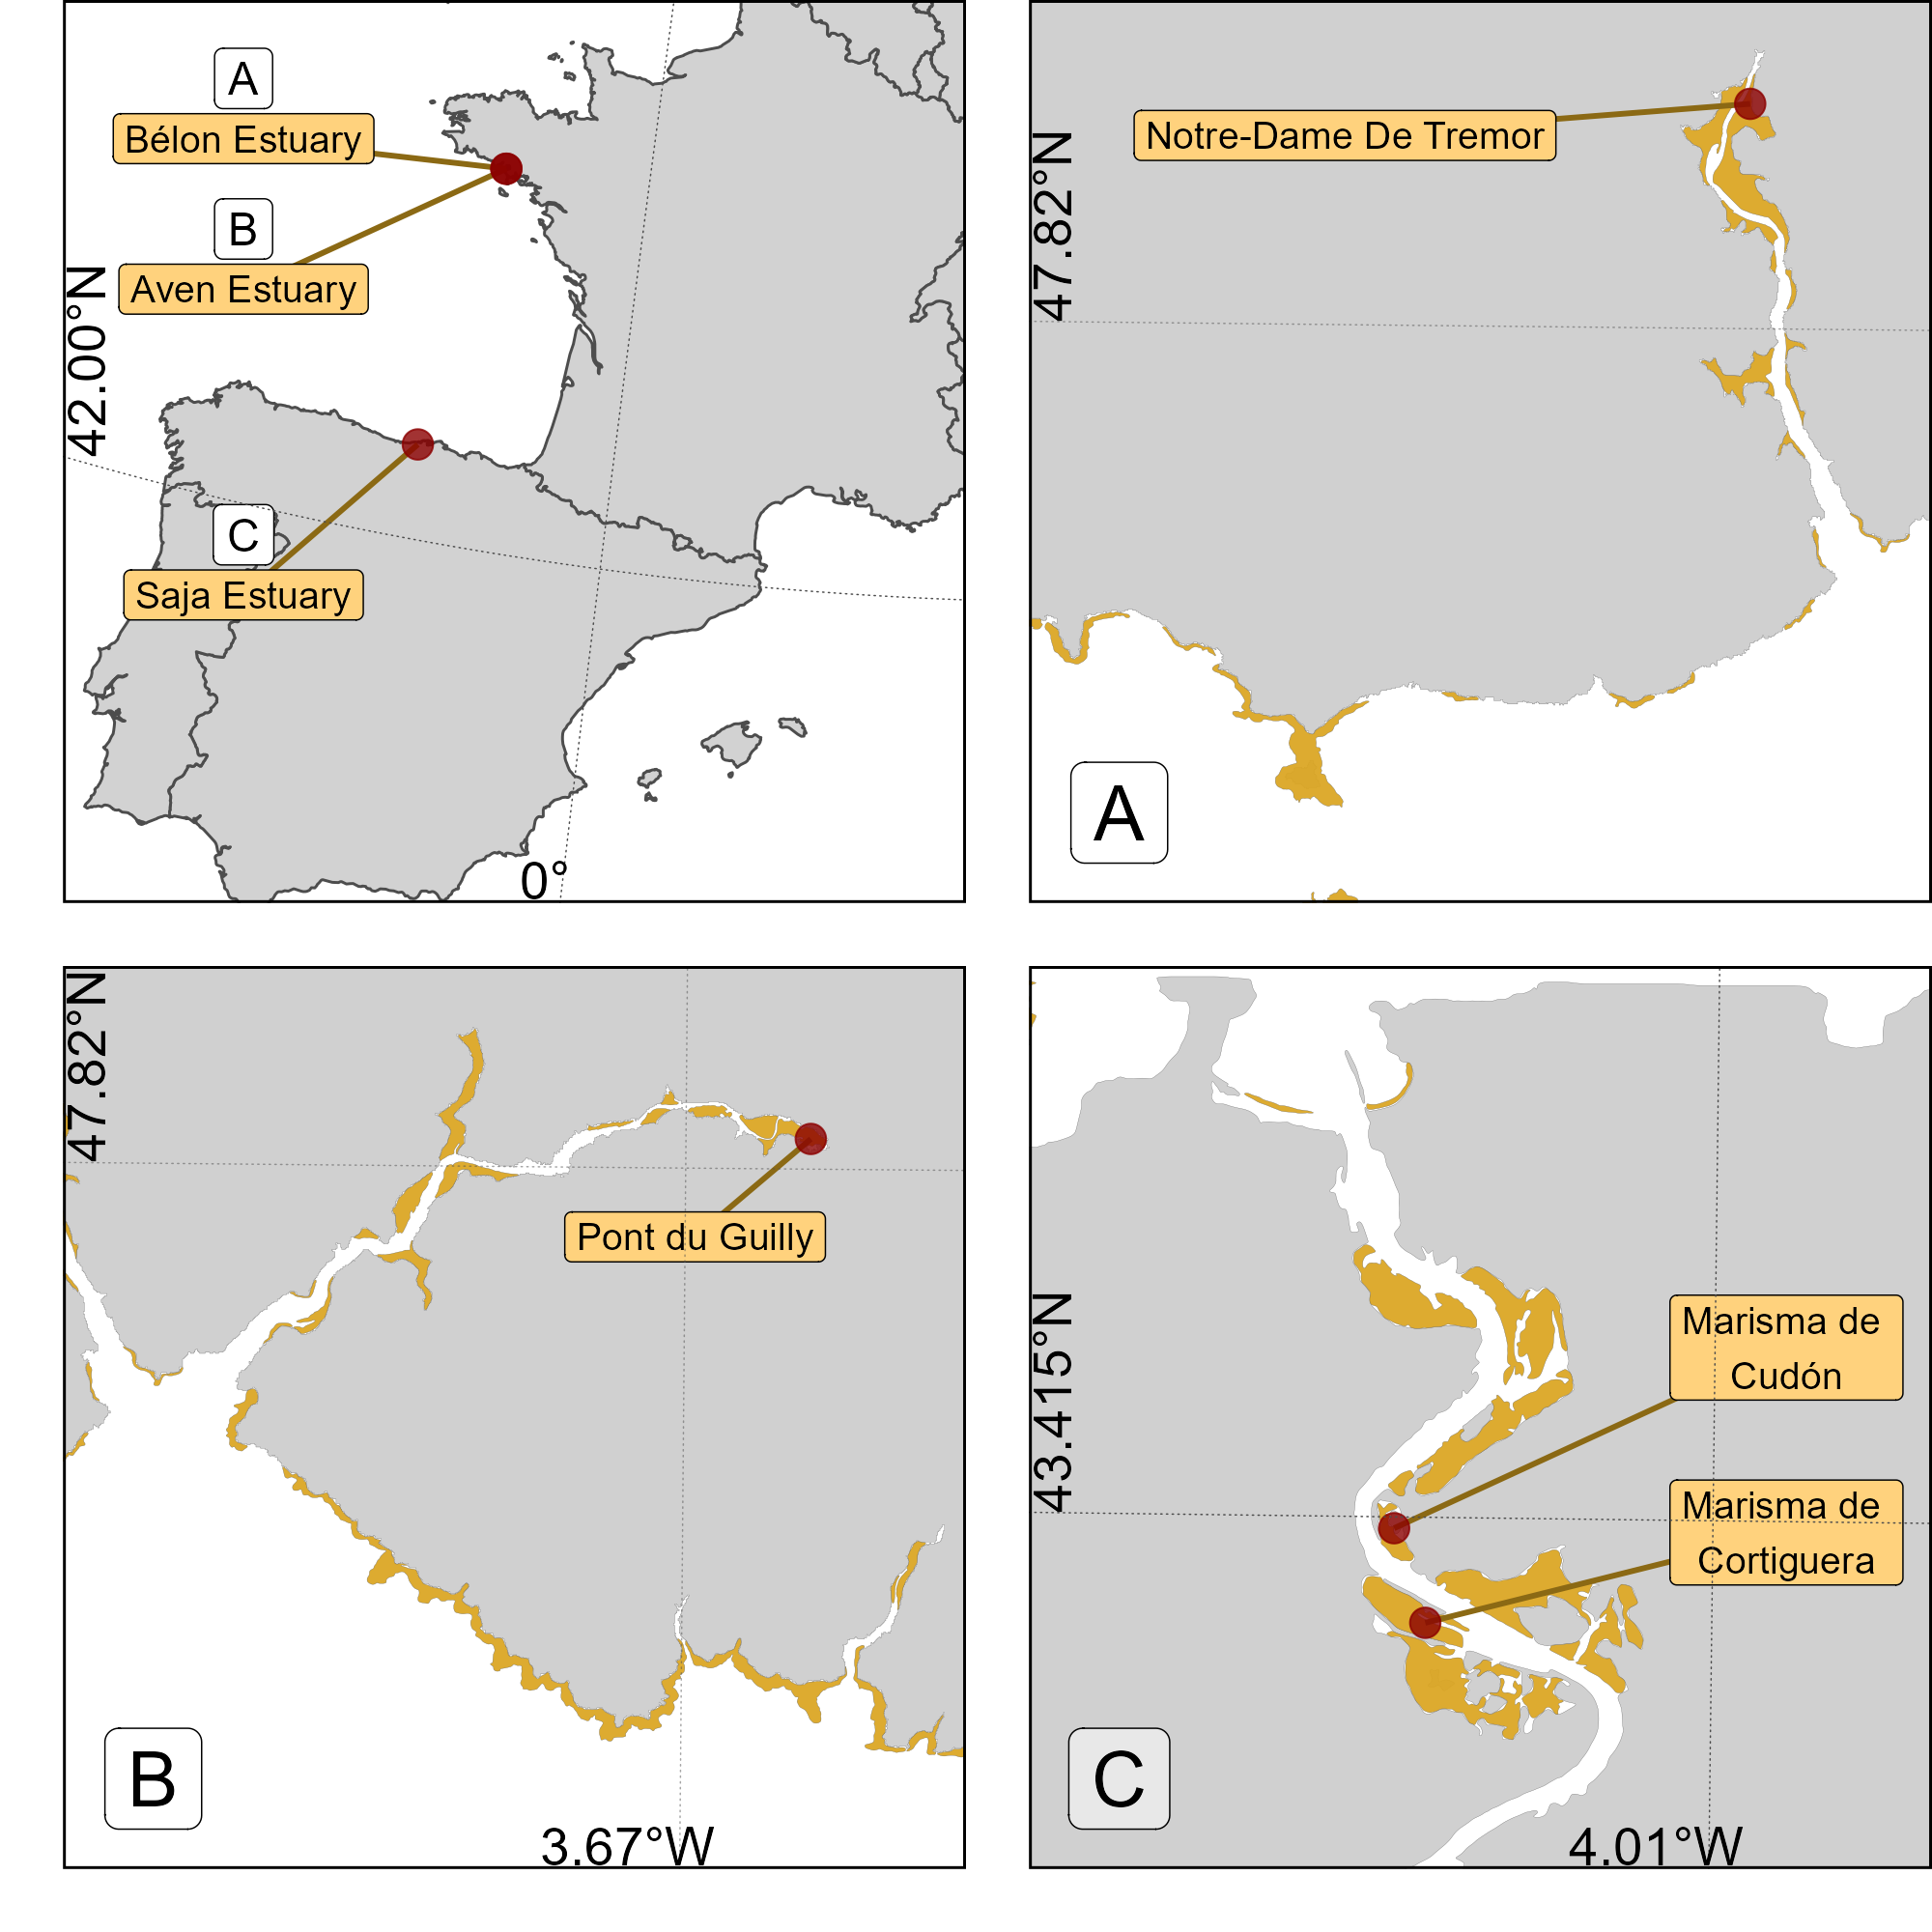

In [ ]:
knitr::include_graphics("Figures/Low_res/Figure1/Map_site.png")

## Remote sensing data acquisition and pre-processing

In [ ]:
library(flextable)
df <- data.frame(Country = c("France", "France","Spain", "Spain"),
                 Site = c("Aven & Belon","Aven & Belon", "Saja Estuary","Saja Estuary"),
                 Flight  = c("Notre-Dame De Tremor","Pont du Guilly","Marisma de Cortiguera","Marisma de Cudón"),
                 Date = c("2024-04-11","2024-04-11","2024-06-25","2024-06-25"), 
                 Area = c(266582,213064,204133,83757)) %>% 
  mutate(Area = round(Area * 0.0001,1))



brdr1 <- fp_border_default(color = "black", width = 0.5)
brdr2 <- fp_border_default(color = "grey", width = 1)
brdr3 <- fp_border_default(color = "grey40", width = 1)

 i = 16.5 # width of the side borders in the word_document output (in centimeters)
 w = i*0.3937 # width of the side borders in the word_document output (in inches)
 
flx1 <- flextable(df)  %>%
  flextable::width(width = (w/(ncol(df)))) %>% 
  merge_v(j = 1) %>%
  merge_v(j = 2) %>%
    border_remove() %>%
    hline_top(border=brdr1) %>%
    hline_bottom(border=brdr1) %>% 
    hline(i=4, border=brdr1) %>% 
    hline(i=2, border=brdr1) %>% 
    hline(i=1, border=brdr2)%>% 
    hline(i=3, border=brdr2)%>% 
    # hline(i=5, border=brdr2) %>% 
    flextable::align(align = "center",part = "all") %>%
    flextable::align(align = "center",part = "header") %>%
  # set_caption(caption = "Table 1 List of drone Flight, summarising the date, the altitude and the purpose of each flight.") %>%
  set_table_properties(layout = "autofit") 

save_as_image(flx1, "Paper/Figures/High_res/table_flights.png", res = 400)

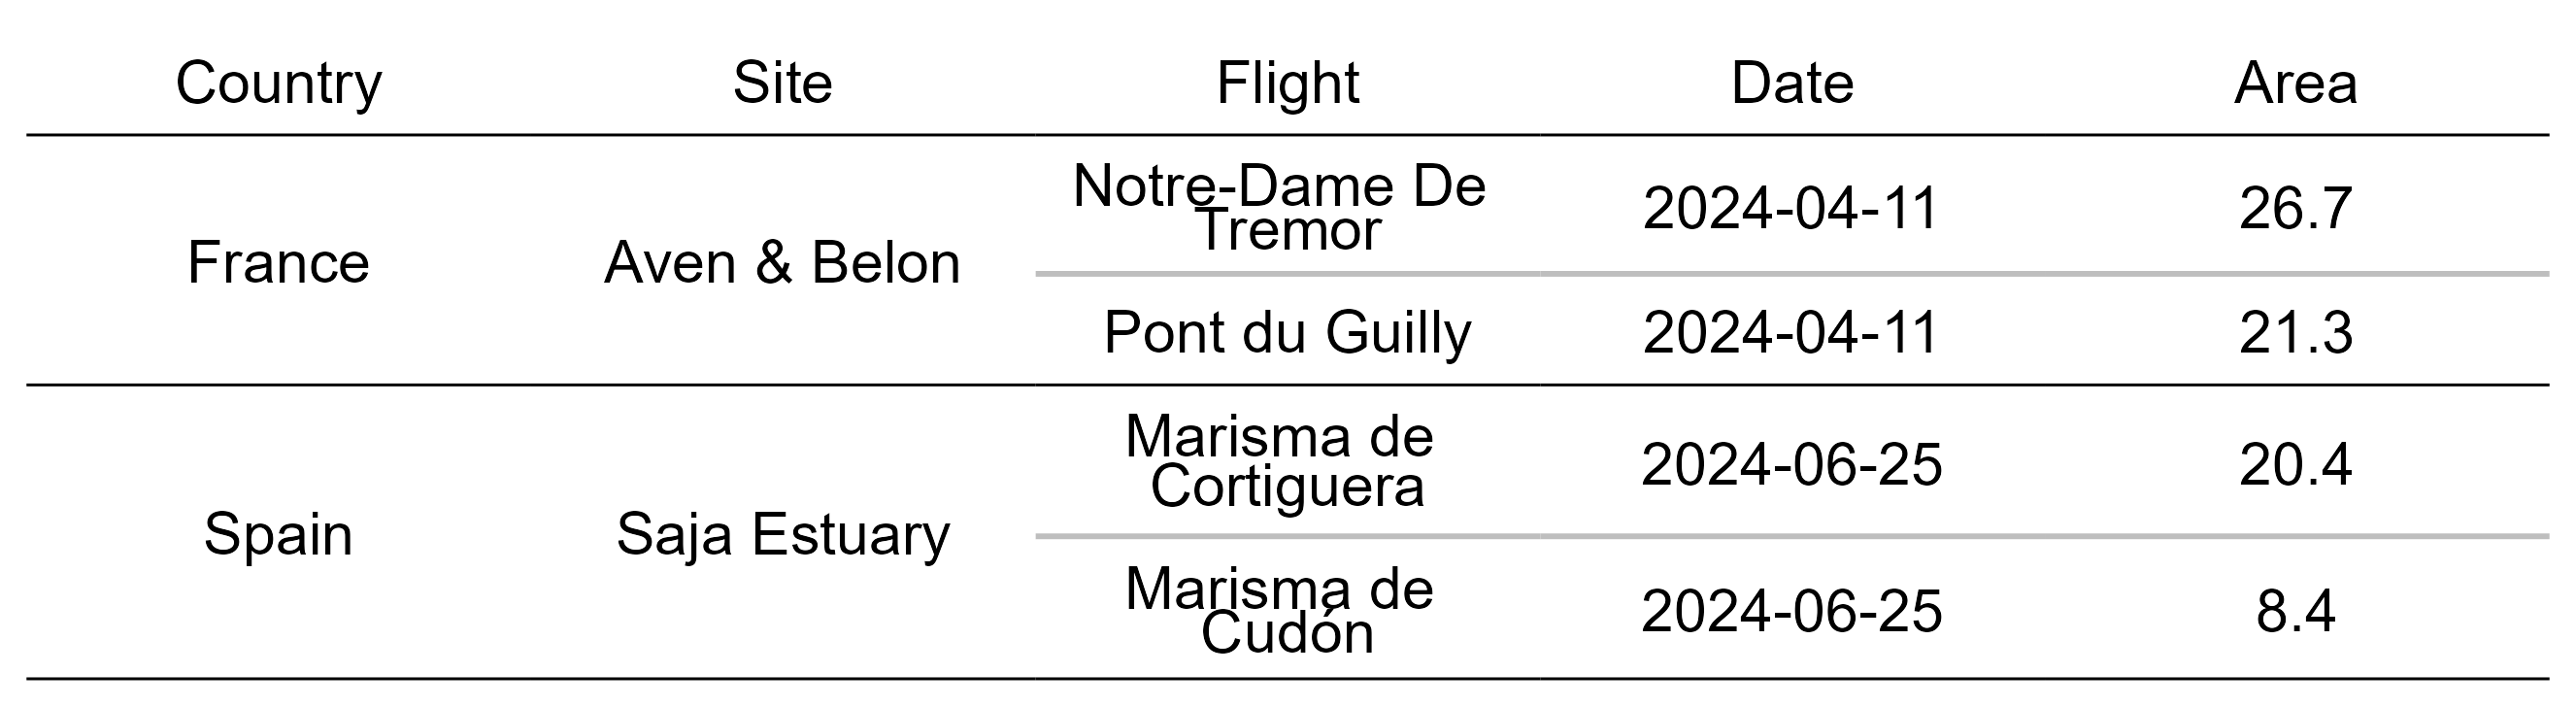

In [ ]:
knitr::include_graphics("Figures/High_res/table_flights.png")

A total of 6 drone flights were done spread in the 3 study sites. Each time, flights were done at an altitude of 120 m and at a speed of 10 m.s<sup>-1</sup> (@tbl-flights).

### Multispectral data

At each location, reflectance images with a resolution of 1.2 million pixels were captured using a DJI Matrice 300 quadcopter drone equipped with a Micasense RedEdge Dual MX multispectral camera. The camera recorded data across ten spectral bands, spanning from blue to near-infrared (NIR) wavelengths (444, 475, 531, 560, 650, 668, 705, 717, 740, and 840 nm) (). To ensure consistent lighting conditions, the drone’s flight trajectory was aligned to maintain a solar azimuth angle of 90 degrees. Image acquisition was carried out with an overlap of 70% between side-by-side images and 80% between successive images along the flight path. A downwelling light sensor (DLS2) was used to measure real-time irradiance, enabling the correction of reflectance values for variations in light intensity caused by cloud cover during the flight. The raw image data were subsequently calibrated to reflectance using a calibration panel with ~50% reflectivity, provided by the camera’s manufacturer. Images were processed using structure-from-motion photogrammetry software \[@agisoft\] to generate multispectral ortho-mosaics for each flight. The ortho-mosaicking workflow was consistent across all flights. Initially, key tie points were identified within each image and across overlapping images to create a sparse point cloud. This point cloud was refined by removing noisy points using a reprojection accuracy metric. Subsequently, a dense point cloud was generated using a structure-from-motion algorithm. A digital surface model (DSM) was then created through surface interpolation of the dense point cloud, which served as the basis for reconstructing the multispectral ortho-image \[@nebel2020review\]. The resolution of the multispectral ortho-mosaic obtained were 8 cm per pixel.

### LiDAR data

LiDAR standing for Light Detection and Ranging uses lasers to measure distances by timing reflected pulses, creating detailed 3D maps of surfaces.

Using the Matrice 300 Series Dual Gimbal Connector, a DJI Zenmuse L1 LiDAR and RGB sensor was mounted on the drone alongside a multispectral camera. This setup enabled the simultaneous capture of LiDAR point clouds, high-resolution RGB images, and multispectral images collected by the MicaSense RedEdge Dual MX during the same flight. The same processing workflow as @sec-photo was applied to process LiDAR RGB images, resulting in ortho-mosaic with a resolution of 2.5 cm per pixel. Since the mapping focused solely on flat surfaces without dense vegetation, the LiDAR measured only a single return. Operating in repetitive scanning mode with a sampling rate of 240 kHz, the system achieved a point density of 350 points per square meter. The LiDAR point cloud was extracted and converted into LAS format using DJI Terra software. The LAS point cloud was then imported into Agisoft Metashape \[@agisoft\] to generate a DEM with a resolution of 2.5 cm.

## Scene classification

A neural network classification model (DISCOV; @rs16234383; @oiry_2024_14218984), previously applied with success to Micasense reflectance data for mapping intertidal vegetation along the Portuguese and French Atlantic coasts, has been used in this study. The training dataset of DISCOV v1.0 has been updated. As shown by @rs16234383 the DISCOV v1.0 model \[@oiry_2024_14218984\] was trained using only 5771 Rhodophyceae pixel (3% of the training dataset). To fill this gap the original training dataset of DISCOV v1.0 was updated using new training pixel coming from the 5 drone flights (@sec-DroneFlights).

In [ ]:
library(tidyverse)
library(flextable)

df_training <- "Data/Training_DISCOV/DISCOV_Invasea_Saja_filtered.txt" %>% 
  read.delim(sep = ";")


brdr1 <- fp_border_default(color = "black", width = 0.5)
brdr2 <- fp_border_default(color = "grey", width = 1)
brdr3 <- fp_border_default(color = "grey40", width = 1)

i = 16.5 # width of the side borders in the word_document output (in centimeters)
w = i*0.3937 # width of the side borders in the word_document output (in inches)
 
df_training %>% 
  dplyr::filter(True_Class != "SunGlint") %>% 
  mutate(DISCOV1_n = case_when(True_Class == "Bacillariophyceae" ~ 4475,
                          True_Class == "Chlorophyta" ~ 17140,
                          True_Class == "Magnoliopsida" ~ 221065,
                          True_Class == "Phaeophyta" ~ 169936,
                          True_Class == "Rhodophyta" ~ 5771,
                          True_Class == "Water" ~ 83677,
                          True_Class == "Sediment" ~ 95126),
         Name = case_when(True_Class == "Bacillariophyceae" ~ "Benthic Diatoms",
                          True_Class == "Chlorophyta" ~ "Green macroalgae",
                          True_Class == "Magnoliopsida" ~ "Seagrass",
                          True_Class == "Phaeophyta" ~ "Brown macroalgae",
                          True_Class == "Rhodophyta" ~ "Red macroalgae",
                          T ~ True_Class),
         True_Class = case_when(True_Class == "Sediment" ~ "-",
                                True_Class == "Water" ~ "-",
                                T ~ True_Class),
         `Difference with DISCOV V1.0` = round((n)/DISCOV1_n,2),
         `Difference with DISCOV V1.0` = case_when(`Difference with DISCOV V1.0` == 1 ~ "-",
                                                   T ~ paste0("x",`Difference with DISCOV V1.0`))) %>%
  rename(`Taxonomic Class` = "True_Class",
         `Training Pixels` = "n") %>% 
  dplyr::select(Name,`Taxonomic Class`,`Training Pixels`, `Difference with DISCOV V1.0`) %>% 
  flextable()

# Results

## Classification

In [ ]:
library(terra)
library(tidyverse)
library(Utilities.Package)
library(sf)

msk <- "Data/shp/mask/Belon_32630.shp" %>% 
  read_sf()

DISCOV_rast <- rast("Data/DISCOV/Belon_1104_MS_DISCOV_InvaSea_26112024_pred.tif") %>% 
  project(crs(msk), method = "near") %>% 
  crop(msk, mask = T)

values(DISCOV_rast)[values(DISCOV_rast) == 0] = NA
names(DISCOV_rast) <- "layer"
DISCOV_rast<-DISCOV_rast %>% 
  as.factor()

DISCOV_Belon <- ggplot()+
    tidyterra::geom_spatraster(data = DISCOV_rast, 
                               mapping = aes(fill = layer),
                               maxcell = 500832*8)+
  scale_fill_manual(breaks = c(1,2,3,4,5,6,8),
                    values=c("#DAA520","#b3ff1a","#389318","#873e23","#b3002d","#a2a3a2","#42c9bc",NA,NA),
                    na.value = NA,
                    name = "",
                    labels = c("Bacillariophyceae",
                               "Chlorophyceae",
                               "Magnoliopsida",
                               "Phaeophyceae",
                               "Rhodophyceae",
                               "Sediment",
                               "Water"))+
  geom_text(aes(x =  ext(DISCOV_rast)[1]+0.04*(ext(DISCOV_rast)[2]-ext(DISCOV_rast)[1]),
                y =  ext(DISCOV_rast)[4]-0.08*(ext(DISCOV_rast)[4]-ext(DISCOV_rast)[3]),
                label = "A"),
                size = 10)+
  coord_sf(expand = F)+
  theme_Bede_Map()+
  # coord_equal()+
   theme(
     # axis.text.x = element_text(size = 10, angle = -20, color = NA,hjust = 0),
         axis.text.y = element_text(size = 10),
         axis.text.x = element_blank(),
         axis.ticks.x = element_blank(),
         axis.title = element_blank(),
         plot.background = element_rect(fill = "white", color = NA),
         legend.background = element_blank(),
         legend.position = c(0.98,0.98),
         legend.text = element_text(size = 10),
         legend.key.size = unit(0.5,"cm"))

ggsave("Paper/Figures/High_res/Prediction_Map/Belon_DISCOV.png",DISCOV_Belon,width = 10, height = 4.225, dpi = 400)

In [ ]:
library(sf)
library(terra)
library(tidyverse)
library(Utilities.Package)

msk <- "Data/shp/mask/Belon_32630.shp" %>% 
  read_sf()

Belon_RGB <- "Data/RGB/Belon_RGB_MULTI.tif" %>% 
  rast() %>% 
  crop(msk, mask = T)

# values(Belon_RGB[[1]])[values(Belon_RGB[[1]]) == 0] = NA

# RGB(Belon_RGB) <- 1:3

 RGB_Belon<- ggplot()+
   tidyterra::geom_spatraster_rgb(data = Belon_RGB,
         r = 1,
         g = 2,
         b = 3,
         maxcell = 4010533
         )+
  geom_text(aes(x =  ext(Belon_RGB)[1]+0.04*(ext(Belon_RGB)[2]-ext(Belon_RGB)[1]),
                y =  ext(Belon_RGB)[4]-0.08*(ext(Belon_RGB)[4]-ext(Belon_RGB)[3]),
                label = "B"),
                size = 10)+
    ggspatial::annotation_scale(location = "br",
                                pad_y = unit(0.5, "cm"),
                                text_cex=2)+
   theme_Bede_Map()+
   coord_sf(expand = F)+
  # coord_equal()+
   theme(
     # axis.text.x = element_text(size = 10, angle = -20,hjust = 0, color = NA),
         axis.text.y = element_text(size = 10),
         axis.text.x = element_blank(),
         # axis.ticks.y = element_blank(),
         axis.ticks.x= element_blank(),
         plot.background = element_rect(fill = "white", color = NA), 
         axis.title = element_blank())

 
 ggsave("Paper/Figures/High_res/Prediction_Map/Belon_RGB.png",RGB_Belon,width = 10, height = 4.225, dpi = 400)

In [ ]:
library(terra)
library(tidyverse)
library(Utilities.Package)
library(scico)



msk <- "Data/shp/mask/Belon_DEM_32630.shp" %>% 
  read_sf()

DEM_rast <- rast("Data/DEM/Belon_DEM_LiDAR.tif") %>% 
  crop(msk, mask = T)

p999 <- quantile(DEM_rast %>% as.data.frame() %>%  pull(Belon_DEM_LiDAR), probs = 0.999)

values(DEM_rast)[values(DEM_rast) > p999] = NA
values(DEM_rast)[values(DEM_rast) < 0] = NA


bathy_Belon <- ggplot()+
   tidyterra::geom_spatraster_rgb(data = Belon_RGB,
         r = 1,
         g = 2,
         b = 3,
         maxcell = 100000,
         alpha = 0
         )+
    tidyterra::geom_spatraster(data = DEM_rast, 
                               mapping = aes(fill = Belon_DEM_LiDAR ),
                               maxcell = 500832)+
  scale_fill_scico(palette = "batlow", na.value = NA,
                   name = "Bathymetry",
                   breaks = c(0,1.5,3),
                   limits = c(0,3),
                   labels = c("0 m","1.5 m", "3 m")) +
  geom_text(aes(x =  ext(Belon_RGB)[1]+0.04*(ext(Belon_RGB)[2]-ext(Belon_RGB)[1]),
                y =  ext(Belon_RGB)[4]-0.08*(ext(Belon_RGB)[4]-ext(Belon_RGB)[3]),
                label = "C"),
                size = 10)+
  theme_Bede_Map()+
  coord_sf(expand = F)+
  # coord_equal()+
   theme(axis.text.x = element_text(size = 10, angle = -20,hjust = 0),
         axis.text.y = element_text(size = 10),
         # axis.text.y = element_blank(),
         # axis.ticks.y = element_blank(), 
         axis.title = element_blank(),
         plot.background = element_rect(fill = "white", color = NA),
         legend.background = element_blank(),
         legend.position = c(0.98,0.98),
         legend.title = element_text(hjust = 0.5),
         legend.text = element_text(size = 10),
         legend.key.size = unit(0.5,"cm"))

 ggsave("Paper/Figures/High_res/Prediction_Map/Belon_Bathy.png",bathy_Belon,width = 10, height = 4.56, dpi = 400)
 
 # nrow(DEM_rast %>%  as.data.frame() %>% dplyr::filter(!is.na(Belon_DEM_LiDAR)))

In [ ]:
library(sf)
library(terra)
library(tidyverse)
library(Utilities.Package)

RGB <- rast("Paper/Figures/High_res/Prediction_Map/Belon_RGB.png")
RGB(RGB) <- 1:3

Pred <- rast("Paper/Figures/High_res/Prediction_Map/Belon_DISCOV.png")
RGB(Pred) <- 1:3


Bathy <- rast("Paper/Figures/High_res/Prediction_Map/Belon_Bathy.png")
RGB(Pred) <- 1:3

offset = 50

ext(Pred) <- c(0,4000,1689,1689*2)
ext(RGB) <- c(0,4000,offset,1689+offset)
ext(Bathy) <- c(0,4000,-1823+(2*offset),2*offset)

 Belon_patchwork<- ggplot()+
   tidyterra::geom_spatraster_rgb(data = Pred,
         r = 1,
         g = 2,
         b = 3,
         maxcell = 4000*1689
         )+
   tidyterra::geom_spatraster_rgb(data = RGB,
         r = 1,
         g = 2,
         b = 3,
         maxcell = 4000*1689
         )+
   tidyterra::geom_spatraster_rgb(data = Bathy,
         r = 1,
         g = 2,
         b = 3,
         maxcell = 4000*1689
         )+
   coord_equal()+
   theme_void()

ggsave("Paper/Figures/High_res/Prediction_Map/Belon_maps.png",Belon_patchwork,width = 7.89, height = 10, dpi = 400)
ggsave("Paper/Figures/Low_res/Belon_maps.png",Belon_patchwork,width = 7.89, height = 10, dpi = 200)

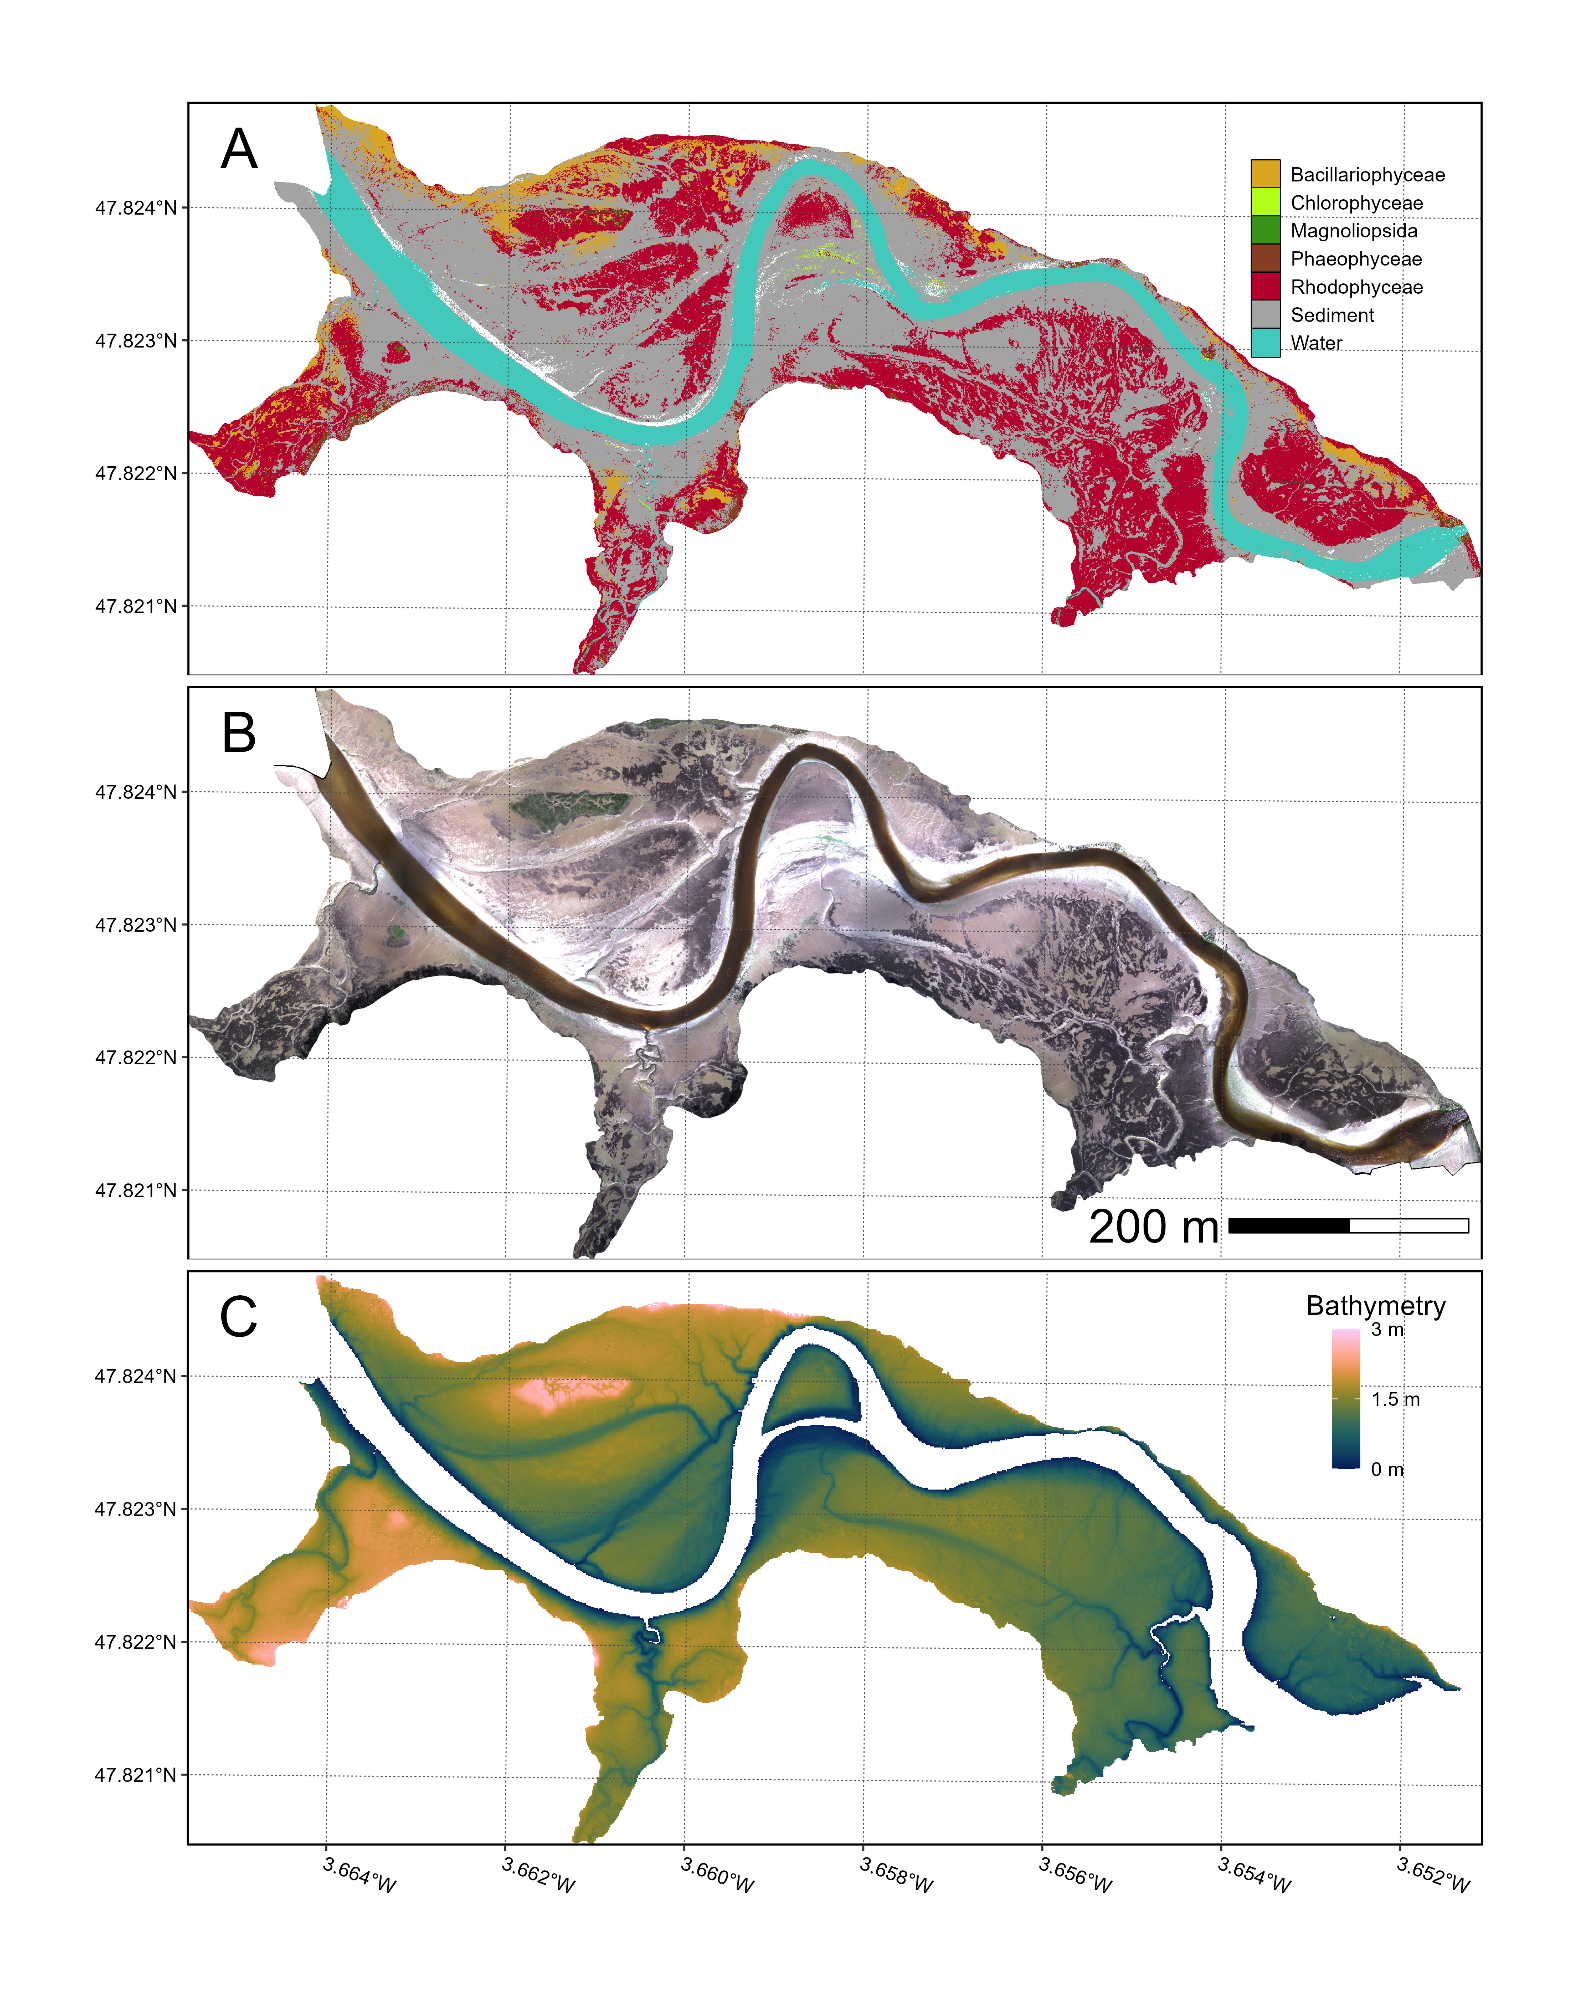

In [ ]:
knitr::include_graphics("./Figures/Low_res/Belon_maps.png")

## Spectral description

In [ ]:
library(tidyverse)
library(terra)
library(sf)

multi_list <- "Data/Multi" %>% 
  list.files(pattern = "tif", full.names = T) %>% 
  as.tibble() %>% 
  rename(path = "value") %>% 
  mutate(filename = gsub(".*/","",path),
         site = case_when(str_detect(filename, "Belon") ~ "Belon",
                          str_detect(filename, "Aven") ~ "Aven",
                          str_detect(filename, "Saja_North") ~ "SajaNorth",
                          str_detect(filename, "Saja_South") ~ "SajaSouth"))

DISCOV_list <- "Data/DISCOV" %>% 
  list.files(pattern = "tif", full.names = T)%>% 
  as.tibble() %>% 
  rename(pred_path = "value") %>% 
  mutate(filename = gsub(".*/","",pred_path),
         site = case_when(str_detect(filename, "Belon") ~ "Belon",
                          str_detect(filename, "Aven") ~ "Aven",
                          str_detect(filename, "Saja_North") ~ "SajaNorth",
                          str_detect(filename, "Saja_South") ~ "SajaSouth")) %>% 
  select(pred_path,site)

msk_list <- "Data/shp/mask" %>% 
  list.files(pattern = ".shp",full.names = T)%>% 
  as.tibble() %>% 
  rename(shp_path = "value") %>% 
  mutate(filename = gsub(".*/","",shp_path),
         site = case_when(str_detect(filename, "Belon") ~ "Belon",
                          str_detect(filename, "Aven") ~ "Aven",
                          str_detect(filename, "SajaNorth") ~ "SajaNorth",
                          str_detect(filename, "SajaSouth") ~ "SajaSouth")) %>% 
  group_by(site) %>% 
  slice(1) %>% 
  select(shp_path,site)

DEM_list <- "Data/DEM" %>% 
  list.files(pattern = ".tif",full.names = T) %>% 
  as.tibble() %>% 
  rename(DEM_path = "value") %>% 
  mutate(filename = gsub(".*/","",DEM_path),
         site = case_when(str_detect(filename, "Belon") ~ "Belon",
                          str_detect(filename, "Aven") ~ "Aven",
                          str_detect(filename, "SajaNorth") ~ "SajaNorth",
                          str_detect(filename, "SajaSouth") ~ "SajaSouth")) %>% 
  group_by(site) %>% 
  slice(1) %>% 
  select(DEM_path,site)

df_file <- multi_list %>% 
  left_join(DISCOV_list, by ="site") %>% 
  left_join(msk_list, by ="site")%>% 
  left_join(DEM_list, by ="site")


for (i in 1:nrow(df_file)) {
  
  msk <- df_file$shp_path[i] %>% read_sf()
  
  multi <- rast(df_file$path[i]) %>% 
    project(crs(msk)) %>% 
    crop(msk, mask = T)
  names(multi) <- c(paste0("B",1:10))
  
  pred <- rast(df_file$pred_path[i])%>% 
    project(crs(msk),method = "near") %>% 
    crop(msk, mask = T) %>% 
    resample(multi, method = "near")
  names(pred) <- "Pred"
  
  DEM <- rast(df_file$DEM_path[i]) %>% 
    resample(multi, method = "bilinear") %>% 
    crop(msk, mask = T)
  names(DEM) <- "DEM"
  
  
  
  stk <- c(multi,pred,DEM) %>% 
    as.data.frame() %>% 
    mutate(site = df_file$site[i]) %>% 
    dplyr::filter(B1 > 0,
                  Pred !=0) %>% 
    mutate(ID = c(1:nrow(.)),
           NDVI = (B10-B6)/(B10+B6))
  
  sp <- stk %>% 
    pivot_longer(-c(Pred,DEM,site, ID, NDVI), names_to = "bands", values_to = "values") %>% 
    group_by(Pred, bands) %>% 
    reframe(mean = mean(values, na.rm = T),
            sd = sd(values, na.rm = T))
  
  
  wv <- data.frame(bands = paste0("B",c(1:10)),
                   wv = c(444,475,531,560,650,668,705,717,740,840))
  
  sp %>% 
    left_join(wv, by = "bands") %>% 
    ggplot()+
    geom_line(aes(x = wv, y = mean, color = as.factor(Pred), group = Pred))
  
  stk %>%
    dplyr::filter(Pred == 5) %>% 
    ggplot()+
    geom_density_2d(aes(x = DEM, y = NDVI))
  
  if(i == 1){
    df_all <- stk
  }else{
    df_all <- rbind(df_all, stk)
  }
}

# Discussion

## Drone mapping *G. vermiculophylla* with machine learning

In this study, we produced the first spatial distribution maps of the invasive red alga *Gracilaria vermiculophylla* using a multispectral drone survey conducted at low tide in Atlantic estuaries representing varied environmental conditions. In southern Brittany, the species formed monospecific mats, while in the Cantabrian region of Spain, it was intermixed with other intertidal vegetation. Distinguishing among these vegetation types was a key prerequisite for the analysis.

To achieve this, we adapted the deep learning-based classification model DISCOV \[@rs16234383\], initially developed to discriminate seagrass from green macroalgae. Although the original model included Rhodophyceae as a class, this group constituted less than 3% of its training dataset. In contrast, the updated model presented here was trained on a dataset in which *G. vermiculophylla* covered 26% of approximately one million pixels. This improved dataset allowed the model to achieve an accuracy of **X%**.

Rhodophytes possess unique phycobilin pigments, enabling their spectral distinction from other macroalgal groups \[@rs14020346; @olmedo2020far; @rs11060704\]. Even with the ten-band multispectral sensor used in our study, it remained feasible to discriminate the major classes of intertidal macrophytes \[@roman2021using; @rs16234383; @davies2023multi\]. However, the model identifies *G. vermiculophylla* at the class level (Rhodophyceae) rather than at the species level. Although hyperspectral approaches may allow finer taxonomic resolution \[@rs14020346; @olmedo2020far\], it is unlikely that Gracilaria species can be precisely distinguished using standard multispectral sensors.

Ecological factors also aid in differentiating *G. vermiculophylla*. Unlike many other macroalgae that require hard substrates,\* G. vermiculophylla\* establishes itself on soft-bottom sediments. In fact, it is commonly found on mudflats, anchoring its thalli in the top 10 cm of mud \[@surget2017processus\], and inhabits the upper intertidal zone—an unusual trait for a Rhodophyte \[@abreu2011nitrogen; @davoult2017multiple\]. By reliably detecting *G. vermiculophylla* in these soft-substrate, upper intertidal habitats, our method provides a framework for identifying environmental conditions that favor its spread, potentially offering managers early-warning indicators to control its expansion before it reaches nuisance levels. Thus, combining spectral data with sediment characteristics provides a strong indicator of *G. vermiculophylla* presence in European Atlantic estuaries, complementing the physical variables already used in species distribution modeling \[@jmse11020367\].

In addition, the scalability of drone-based surveying facilitates repeat mapping to detect temporal shifts in the distribution and abundance of *G. vermiculophylla.* Such continuous monitoring could capture seasonal patterns of colonization, allowing researchers and environmental managers to evaluate the effectiveness of mitigation measures, track long-term ecological impacts, and anticipate future shifts in habitat suitability under changing climate conditions.

## *G. vermiculophylla* spatial distribution and mudflat topography

## Spatio-temporal monitoring of invasive macroalgae

Accurate, high-resolution maps of invasive or alien species are extremely scarce (**REF**), yet they enable in-depth evaluations of these species’ ecology, temporal dynamics, and niche behavior in relation to their environment. In this study, using individual flights over monospecific algal mats, we quantified how this invasive alga associates with local mudflat topography, demonstrating that **…**. Repeated monitoring of this type can further reveal phenological patterns, invasion dynamics, and local conspecific biological interactions—such as co-occurrence, displacement, or avoidance (**REF**).

Remote sensing using multispectral drone mapping can provide high-resolution, spatially explicit data, but it must be combined with repeated, in situ field measurements to maximize its potential (**REF**). As noted, temporal repetition makes it possible to assess dynamic processes, and integrating these mapping approaches with in situ analyses of local infauna, carbon cycling, riverine inputs, and sedimentology would yield valuable insights for local managers. Such an integrated approach could help determine how the invasive alga affects the local ecosystem and, more broadly, forecast its potential impact on other estuarine environments facing similar invasion events. This holistic approach can guide strategic interventions aimed at mitigating the alga’s spread, maintaining ecological balance, and protecting native biodiversity, ensuring that management efforts are informed by accurate, timely, and spatially explicit data.

Invasive species like *Gracilaria vermiculophylla* and *Rugulopteryx okamurae* can be identified using drones equipped with multispectral sensors, taking advantage of the characteristic reflectance of rhodophytes \[@roca2022monitoring\]. However, this capability has not yet been tested using standard RGB sensors found in readily available commercial drones. These drones are easy to deploy, can cover large areas when flying at speeds of 15 m s^-1 at an altitude of 120 m, and still maintain sufficient overlap between images to support photogrammetric reconstruction. Expanding these methodologies to RGB-based detection would significantly lower barriers to entry, allowing local stakeholders with limited resources to access valuable monitoring tools for early detection and rapid response. A promising avenue for operational applications lies in testing machine learning techniques on RGB imagery that do not rely on enhanced spectral resolution. Considering the low cost of RGB and multispectral commercial drones, coupled with ongoing advancements in machine learning, drone-based remote sensing has now matured into a practical tool for adoption by environmental authorities in coastal management. Integrating these technologies into routine monitoring protocols can enhance surveillance capabilities, improve understanding of invasive species dynamics, and ultimately contribute to more effective conservation and restoration strategies.

# Conclusion

# References